<a href="https://colab.research.google.com/github/erankfmn/anomaly_detection/blob/main/value%3B_LSTM_%2BRegTrees_%2B_Group_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns

from google.colab import drive
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from numpy import mean, sqrt, square, arange
from numpy import array
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split

from sklearn import metrics
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns
%matplotlib inline
import seaborn as sns

#plt.style.use(style="seaborn")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
dataset = pd.read_json('/content/gdrive/MyDrive/dataset1.txt')

cdf=dataset.loc[dataset['isError']==0]
df={'index':cdf.index,'DnT':cdf['timeStamp'],'value':cdf['value'],'gas':cdf['gas'],'gasPrice':cdf['gasPrice']}
df=pd.DataFrame(df)
df.to_csv('/content/gdrive/MyDrive/newDataRun/newData.csv')
Data_Set=pd.read_csv('/content/gdrive/MyDrive/newDataRun/newData.csv')
Data_Set

Mounted at /content/gdrive


,Unnamed: 0,index,DnT,value,gas,gasPrice
0,0,0,2017-08-04 14:39:20,1.000000e+17,21000,20000000000
1,1,1,2017-08-04 15:32:36,4.500000e+16,21001,20000000000
2,2,2,2017-08-04 15:51:15,1.000000e+16,21001,4000000001
3,3,3,2017-08-04 15:51:15,1.000000e+16,21001,4000000001
4,4,4,2017-08-04 16:20:20,0.000000e+00,37515,4000000001
...,...,...,...,...,...,...
9965,9995,9995,2017-08-16 10:18:32,2.749000e+19,21001,21000000000
9966,9996,9996,2017-08-16 10:18:32,4.136000e+18,21001,21000000000
9967,9997,9997,2017-08-16 10:18:32,2.734564e+19,21001,21000000000
9968,9998,9998,2017-08-16 10:18:32,3.420000e+18,21001,21000000000


In [ ]:
sens=3

## RegTrees

In [ ]:
cdf=Data_Set
df = cdf[['index','DnT', 'value']]
df.insert(3,"anomaly",2)


train_set, test_set = df.loc[df['DnT'] <= '2017-08-13 00:00:00'], df.loc[df['DnT'] > '2017-08-13 00:00:00']
train=array(train_set['value'])
test=array(test_set['value'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
regressor = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
regressor.fit(array(train_set['index']).reshape([-1,1]), array(train).reshape([-1,1]))
predictions = regressor.predict(array(test_set['index']).reshape([-1,1]))

test_set.insert(4,"prediction",predictions)
test_set.insert(5,"error",abs(predictions-test))
train_set.insert(4,"prediction",None)
train_set.insert(5,"error",None)

rms=np.sqrt(metrics.mean_squared_error(y_true = test, y_pred = predictions))


sns.set(rc={'figure.figsize':(11.7,8.27)})
test_set['anomaly'] = test_set['error'] > sens*rms
df['anomaly'][len(df)-len(test_set):] = test_set['error'] > sens*rms

anomalies = test_set.loc[test_set['anomaly'] == True]

new=pd.concat([train_set, test_set], axis=0)
RegTrees_df=new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
/usr/local/lib/python3.7

In [ ]:
RegTrees_df

,index,DnT,value,anomaly,prediction,error
0,0,2017-08-04 14:39:20,1.000000e+17,2,None,None
1,1,2017-08-04 15:32:36,4.500000e+16,2,None,None
2,2,2017-08-04 15:51:15,1.000000e+16,2,None,None
3,3,2017-08-04 15:51:15,1.000000e+16,2,None,None
4,4,2017-08-04 16:20:20,0.000000e+00,2,None,None
...,...,...,...,...,...,...
9965,9995,2017-08-16 10:18:32,2.749000e+19,0,3.20844e+19,4.59438e+18
9966,9996,2017-08-16 10:18:32,4.136000e+18,0,3.20844e+19,2.79484e+19
9967,9997,2017-08-16 10:18:32,2.734564e+19,0,3.20844e+19,4.73874e+18
9968,9998,2017-08-16 10:18:32,3.420000e+18,0,3.20844e+19,2.86644e+19


## RegTrees Plot

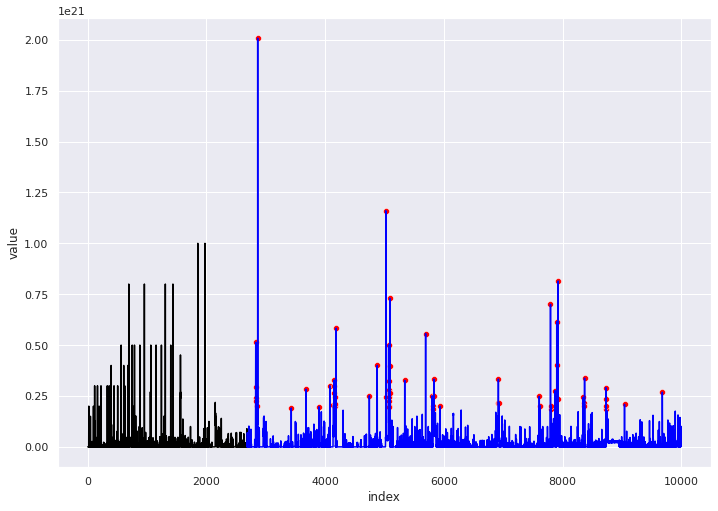

In [ ]:

sns.lineplot(x=train_set['index'], y=train_set['value'],color='black')
sns.lineplot(x=test_set['index'], y=test_set['value'],color='blue')
sns.scatterplot(x=anomalies['index'], y=anomalies['value'], color='red')

## LSTM

In [ ]:
cdf=Data_Set
df = cdf[['index','DnT', 'value']]

In [ ]:
df.insert(3,"real value",df['value'])
df.insert(4,"prediction",0)
df.insert(5,"anomaly",2)
df.insert(6,"anomaly by MAE",0)

df.insert(7,"testMAE",0)
df.insert(8,"max_trainMAE",0)
df

,index,DnT,value,real value,prediction,anomaly,anomaly by MAE,testMAE,max_trainMAE
0,0,2017-08-04 14:39:20,1.000000e+17,1.000000e+17,0,2,0,0,0
1,1,2017-08-04 15:32:36,4.500000e+16,4.500000e+16,0,2,0,0,0
2,2,2017-08-04 15:51:15,1.000000e+16,1.000000e+16,0,2,0,0,0
3,3,2017-08-04 15:51:15,1.000000e+16,1.000000e+16,0,2,0,0,0
4,4,2017-08-04 16:20:20,0.000000e+00,0.000000e+00,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...
9965,9995,2017-08-16 10:18:32,2.749000e+19,2.749000e+19,0,2,0,0,0
9966,9996,2017-08-16 10:18:32,4.136000e+18,4.136000e+18,0,2,0,0,0
9967,9997,2017-08-16 10:18:32,2.734564e+19,2.734564e+19,0,2,0,0,0
9968,9998,2017-08-16 10:18:32,3.420000e+18,3.420000e+18,0,2,0,0,0


In [ ]:
#train_size = int(len(df) * 0.6)
#test_size = len(df) - train_size
#train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
train, test = df.loc[df['DnT'] <= '2017-08-13 00:00:00'], df.loc[df['DnT'] > '2017-08-13 00:00:00']

print(train.shape, test.shape)
df

(2669, 9) (7301, 9)


,index,DnT,value,real value,prediction,anomaly,anomaly by MAE,testMAE,max_trainMAE
0,0,2017-08-04 14:39:20,1.000000e+17,1.000000e+17,0,2,0,0,0
1,1,2017-08-04 15:32:36,4.500000e+16,4.500000e+16,0,2,0,0,0
2,2,2017-08-04 15:51:15,1.000000e+16,1.000000e+16,0,2,0,0,0
3,3,2017-08-04 15:51:15,1.000000e+16,1.000000e+16,0,2,0,0,0
4,4,2017-08-04 16:20:20,0.000000e+00,0.000000e+00,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...
9965,9995,2017-08-16 10:18:32,2.749000e+19,2.749000e+19,0,2,0,0,0
9966,9996,2017-08-16 10:18:32,4.136000e+18,4.136000e+18,0,2,0,0,0
9967,9997,2017-08-16 10:18:32,2.734564e+19,2.734564e+19,0,2,0,0,0
9968,9998,2017-08-16 10:18:32,3.420000e+18,3.420000e+18,0,2,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['value']])

train['value'] = scaler.transform(train[['value']])
test['value'] = scaler.transform(test[['value']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df.value[:len(train)]=train.value
df.value[len(train):]=test.value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, se

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 50

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(
  train[['value']],
  train.value,
  TIME_STEPS
)

X_test, y_test = create_dataset(
  test[['value']],
  test.value,
  TIME_STEPS
)

print(X_train.shape)

(2619, 50, 1)


In [ ]:
model =Sequential()
model.add(LSTM(units=64,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(n=X_train.shape[1]))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(units=X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,  
)

Epoch 1/30
74/74 [==============================] - 9s 77ms/step - loss: 0.2605 - val_loss: 0.1026
Epoch 2/30
74/74 [==============================] - 5s 62ms/step - loss: 0.2535 - val_loss: 0.1044
Epoch 3/30
74/74 [==============================] - 5s 62ms/step - loss: 0.2532 - val_loss: 0.1025
Epoch 4/30
74/74 [==============================] - 5s 63ms/step - loss: 0.2524 - val_loss: 0.0990
Epoch 5/30
74/74 [==============================] - 5s 62ms/step - loss: 0.2513 - val_loss: 0.0983
Epoch 6/30
74/74 [==============================] - 5s 61ms/step - loss: 0.2509 - val_loss: 0.0976
Epoch 7/30
74/74 [==============================] - 5s 63ms/step - loss: 0.2503 - val_loss: 0.0973
Epoch 8/30
74/74 [==============================] - 5s 61ms/step - loss: 0.2502 - val_loss: 0.0973
Epoch 9/30
74/74 [==============================] - 5s 62ms/step - loss: 0.2498 - val_loss: 0.0969
Epoch 10/30
74/74 [==============================] - 5s 61ms/step - loss: 0.2500 - val_loss: 0.0966
Epoch 11/

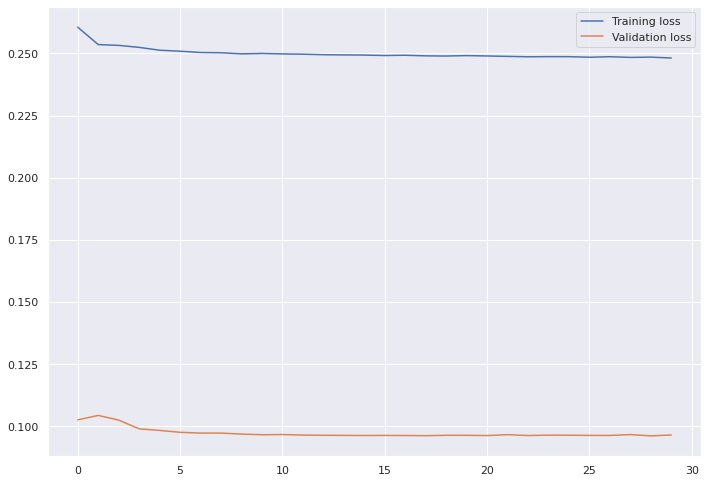

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


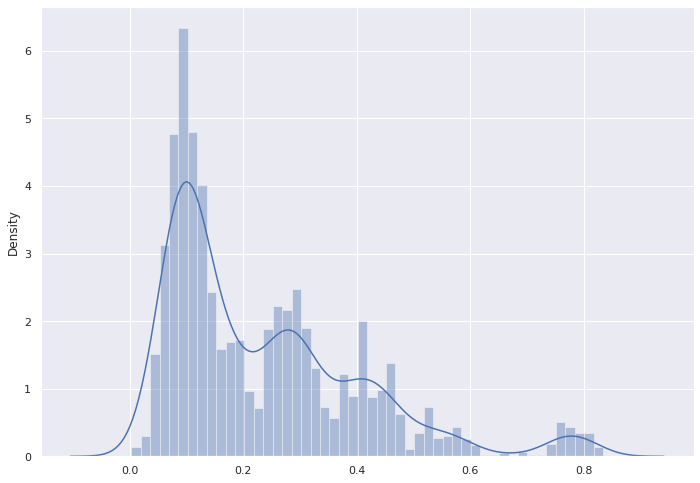

In [ ]:
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)
sns.distplot(train_mae_loss, bins=50, kde=True)

In [ ]:
THRESHOLD = 0.5
THRESHOLD

0.5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


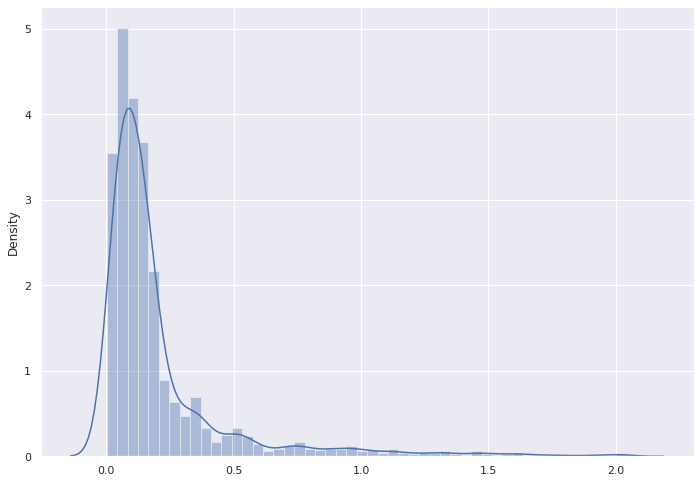

In [ ]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)
sns.distplot(test_mae_loss, bins=50, kde=True)

In [ ]:
test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['value'] = test[TIME_STEPS:].value


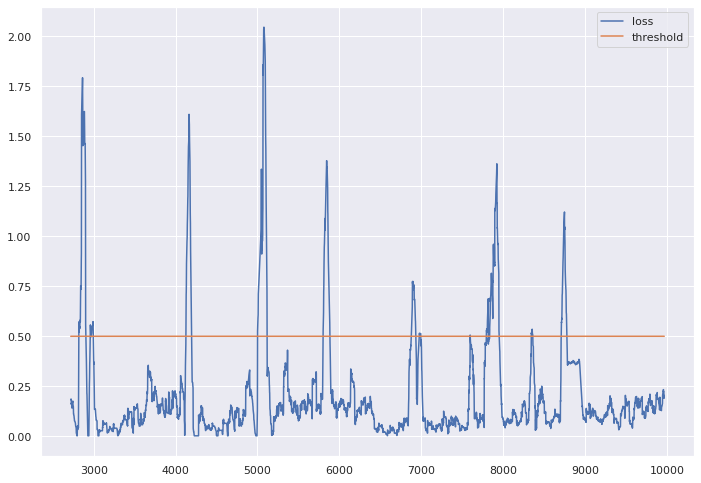

In [ ]:
plt.plot(test_score_df.index,
         test_score_df.loss, 
         label='loss')
plt.plot(test_score_df.index,
         test_score_df.threshold,
         label='threshold')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


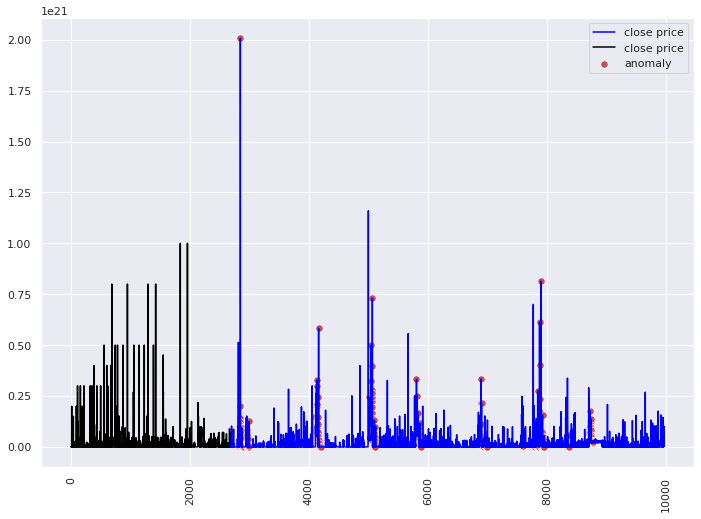

In [ ]:
anomalies = test_score_df[test_score_df.anomaly == True]
sns.scatterplot(
  anomalies.index,
  scaler.inverse_transform([anomalies.value]).flatten(),
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.plot(
  df.index[len(df)-len(test):len(df)],
  scaler.inverse_transform([test.value]).flatten(),
  color="blue",
  label='close price'
);
plt.plot(
  df.index[0:len(train)],
  scaler.inverse_transform([train.value]).flatten(),
  color="black",
  label='close price'
);
plt.xticks(rotation=90)
plt.legend()

In [ ]:
df

,index,DnT,value,real value,prediction,anomaly,anomaly by MAE,testMAE,max_trainMAE
0,0,2017-08-04 14:39:20,-0.234580,1.000000e+17,0,2,0,0,0
1,1,2017-08-04 15:32:36,-0.235519,4.500000e+16,0,2,0,0,0
2,2,2017-08-04 15:51:15,-0.236116,1.000000e+16,0,2,0,0,0
3,3,2017-08-04 15:51:15,-0.236116,1.000000e+16,0,2,0,0,0
4,4,2017-08-04 16:20:20,-0.236287,0.000000e+00,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...
9965,9995,2017-08-16 10:18:32,0.232974,2.749000e+19,0,2,0,0,0
9966,9996,2017-08-16 10:18:32,-0.165684,4.136000e+18,0,2,0,0,0
9967,9997,2017-08-16 10:18:32,0.230510,2.734564e+19,0,2,0,0,0
9968,9998,2017-08-16 10:18:32,-0.177907,3.420000e+18,0,2,0,0,0


In [ ]:
# claculate pred vector

pred=np.zeros(len(test))
for i in range (0,len(X_test_pred)):
  pred[i]=float(X_test_pred[i][0])
pred[len(X_test_pred):]=X_test_pred[len(X_test_pred)-1].flatten()
predValue=scaler.inverse_transform([pred]).reshape(-1, 1).flatten()


In [ ]:
rms=np.sqrt(metrics.mean_squared_error(y_true = test['real value'], y_pred = predValue))
rms

4.6928026428590514e+19

In [ ]:
from numpy import array
from sklearn import metrics

#error by MAE
testMAEVector=np.concatenate((array(np.zeros(len(train)+TIME_STEPS)),test_mae_loss.flatten() ),axis=0)
df['testMAE'][len(df)-len(testMAEVector):] = testMAEVector
df['max_trainMAE'][len(train):] = THRESHOLD
df['anomaly by MAE'][len(df)-len(test_score_df):]  = test_score_df['anomaly']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib

In [ ]:
#error by RMS
#predValue=scaler.inverse_transform([test_score_df.value+test_score_df.loss]).reshape(-1, 1).flatten()
testValue=scaler.inverse_transform([test['value']]).reshape(-1, 1).flatten()
trainValue=scaler.inverse_transform([train['value']]).reshape(-1, 1).flatten()


In [ ]:
from sklearn import metrics

df['prediction'] = np.concatenate((np.zeros(len(df)-len(predValue)),predValue ),axis=0)
df['anomaly'][len(train):] = testValue-predValue > 3*rms
anomaliesRMS = df.loc[df['anomaly'] == True]
anomaliesMAE = df.loc[df['anomaly by MAE'] == True]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,index,DnT,value,real value,prediction,anomaly,anomaly by MAE,testMAE,max_trainMAE
0,0,2017-08-04 14:39:20,-0.234580,1.000000e+17,0.000000e+00,2,0,0.000000,0.0
1,1,2017-08-04 15:32:36,-0.235519,4.500000e+16,0.000000e+00,2,0,0.000000,0.0
2,2,2017-08-04 15:51:15,-0.236116,1.000000e+16,0.000000e+00,2,0,0.000000,0.0
3,3,2017-08-04 15:51:15,-0.236116,1.000000e+16,0.000000e+00,2,0,0.000000,0.0
4,4,2017-08-04 16:20:20,-0.236287,0.000000e+00,0.000000e+00,2,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
9965,9995,2017-08-16 10:18:32,0.232974,2.749000e+19,2.520642e+18,False,False,0.189742,0.5
9966,9996,2017-08-16 10:18:32,-0.165684,4.136000e+18,2.520644e+18,False,False,0.196583,0.5
9967,9997,2017-08-16 10:18:32,0.230510,2.734564e+19,2.520644e+18,False,False,0.199228,0.5
9968,9998,2017-08-16 10:18:32,-0.177907,3.420000e+18,2.520644e+18,False,False,0.202138,0.5


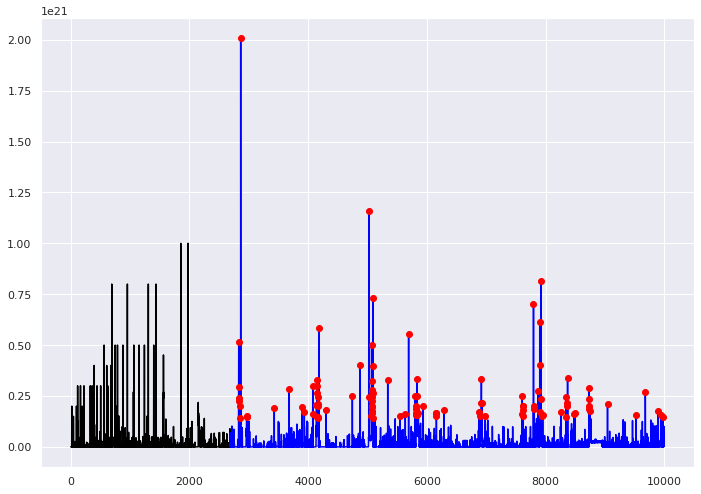

In [ ]:
plt.plot(array(df['index'][:len(train)]), array(df['real value'][:len(train)]), color='black')
plt.plot(array(df['index'][len(train):]), array(df['real value'][len(train):]), color='blue')
plt.plot(array(anomaliesRMS['index']), array(anomaliesRMS['real value']), color='red',marker='o',linestyle='' )
#plt.plot(array(df['index'][len(train):len(df)-100]), array(df['prediction'][len(train):len(df)-100]), color='orange')


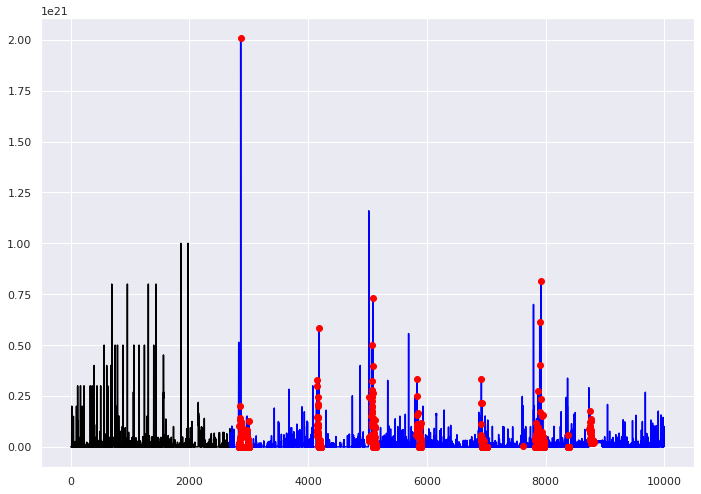

In [ ]:
plt.plot(array(df['index'][:len(train)]), array(df['real value'][:len(train)]), color='black')
plt.plot(array(df['index'][len(train):]), array(df['real value'][len(train):]), color='blue')
plt.plot(array(anomaliesMAE['index']), array(anomaliesMAE['real value']), color='red',marker='o',linestyle='' )


In [ ]:
LSTM_df=df

In [ ]:
len(LSTM_df)

9970

## Group B Calculations

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode()
import numpy as np
import matplotlib.ticker
from numpy import array
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
%matplotlib inline
#import chart_studio.plotly as py
#!pip install plotly==5.3.1
#import plotly.graph_objects as go
#from _plotly_future_ import v4_subplots

In [ ]:
LSTM_anomaly=LSTM_df.loc[LSTM_df['anomaly']==True]
RegTrees_anomaly=RegTrees_df.loc[RegTrees_df['anomaly']==True]


In [ ]:
len(LSTM_df)


9970

In [ ]:
x=LSTM_df['anomaly']
y=RegTrees_df['anomaly']
z=np.zeros(len(df))
for i in range(0,len(y)):
  if x[i]==True and y[i]==True:
    z[i]=True
  else:
    z[i]=False


In [ ]:
totalAno = {'index': df['index'], 
            'DnT': df['DnT'],
            'value': LSTM_df['real value'],
            'LSTM anomaly': LSTM_df['anomaly'],
            'RegTrees anomaly': RegTrees_df['anomaly'],
            'compare':z}
df=pd.DataFrame(totalAno)
totalAno=df.loc[df['compare']==True]


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from google.colab import drive

fig = make_subplots(4, 1)

####### Values
fig.add_trace(go.Scatter(
    x=list(Data_Set['DnT']),
    y=list(Data_Set['value']),
    name="Values",
    text=list(df['DnT']),
    yaxis="y",
    mode="lines",
    showlegend=True,
    marker = dict(color = "blue")
),1, 1)

fig.add_trace(go.Scatter(
    x=list(totalAno['DnT']),
    y=list(totalAno['value']),
    name="Values",
    yaxis="y",
    mode="markers",    
    showlegend=False,
    marker = dict(color = 'red')
),1, 1)

####### RegTrees
fig.add_trace(go.Scatter(
    x=list(RegTrees_df['DnT']),
    y=list(RegTrees_df['value']),
    name="RegTrees",
    text=list(RegTrees_df['value']),
    yaxis="y4",
    mode="lines",
    showlegend=True,
    marker = dict(color = 'orange')
), 2, 1)

fig.add_trace(go.Scatter(
    x=list(RegTrees_anomaly['DnT']),
    y=list(RegTrees_anomaly['value']),
    name="RegTrees",
    yaxis="y4",
    mode="markers",
    text=list(RegTrees_anomaly['value']),
    showlegend=False,
    marker = dict(color = 'red')
), 2, 1)

####### LSTM
fig.add_trace(go.Scatter(
    x=list(LSTM_df['DnT']),
    y=list(LSTM_df['real value']),
    name="LSTM",
    text=list(LSTM_df['value']),
    yaxis="y2",
    mode="lines",
    showlegend=True,
    marker = dict(color = 'green')
), 3, 1)

fig.add_trace(go.Scatter(
    x=list(LSTM_anomaly['DnT']),
    y=list(LSTM_anomaly['real value']),
    name="LSTM",
    text=list(LSTM_anomaly['real value']),
    yaxis="y2",
    mode="markers",
    showlegend=False,
    marker = dict(color = 'red')
), 3, 1)

# style all the traces
fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 2},
    marker={"size": 4},
)


# Update axes
fig.layout.update(
    xaxis=dict(
        autorange=True,
        range=[df['index'][0], df['index'][len(df['index'])-1]],
        rangeslider=dict(autorange=True,range=[df['index'][0], df['index'][len(df['index'])-1]]),
        rangeselector=dict(
            buttons=list([ dict(count=1, label='1d', step='day', stepmode='backward'),
                           dict(count=7, label='7d', step='day', stepmode='backward'),
                        dict(step='all')
                        ])
        ),
        type='-'
    ),
    yaxis=dict(
        domain=[0, 0.2],
        title="Values"
    ),
    yaxis2=dict(
        domain=[0.25, 0.45],
        title="RegTrees"
    ),
    yaxis3=dict(
        domain=[0.5, 0.7],
        title="LSTM"
    ),
)


fig.update_xaxes(matches='x')
fig.layout.update(autosize=False, width=950, height=900)
fig.layout.update(
    title='Group B Calculations',
    xaxis=dict(
        rangeselector=dict(
            x=0.1,
            xanchor="left",
            y=0.8,
            yanchor="top"
            
        )
    )
)


Layout({
    'autosize': False,
    'height': 900,
    'template': '...',
    'title': {'text': 'Group B Calculations'},
    'width': 950,
    'xaxis': {'anchor': 'y',
              'autorange': True,
              'domain': [0.0, 1.0],
              'matches': 'x',
              'range': [0, 9999],
              'rangeselector': {'buttons': [{'count': 1, 'label': '1d', 'step': 'day', 'stepmode': 'backward'},
                                            {'count': 7, 'label': '7d', 'step': 'day', 'stepmode': 'backward'},
                                            {'step': 'all'}],
                                'x': 0.1,
                                'xanchor': 'left',
                                'y': 0.8,
                                'yanchor': 'top'},
              'rangeslider': {'autorange': True, 'range': [0, 9999]},
              'type': '-'},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0], 'matches': 'x'},
    'xaxis3': {'anchor': 'y3', 'domain': [0.0, 1.0], 'match

## Group B plot


In [ ]:
fig.show()

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==True:
           TP=TP+ 1
        if y_pred[i]==True and y_actual[i]==False:
           FP += 1
        if y_actual[i]==y_pred[i]==False:
           TN += 1
        if y_pred[i]==False and y_actual[i]==True:
           FN += 1
    return(TP, FP, TN, FN)

LSTM_measure=perf_measure(df['compare'],LSTM_df['anomaly'])
RegTrees_measure=perf_measure(df['compare'],RegTrees_df['anomaly'])

from tabulate import tabulate

d = [ 
     ["Positive", LSTM_measure[0], LSTM_measure[1]],
     ["Negative",LSTM_measure[2], LSTM_measure[3]],
     ]

print(tabulate(d, headers=["LSTM", "True", "False"])) 
print("")
print( 'Sensitivity:'+ str((LSTM_measure[0])/(LSTM_measure[0]+LSTM_measure[3]))) 
print( 'Specificity:'+ str((LSTM_measure[0])/(LSTM_measure[0]+LSTM_measure[1]) ))
print( 'Accurany:'+ str((LSTM_measure[0]+LSTM_measure[2])/(LSTM_measure[0]+LSTM_measure[1]+LSTM_measure[2]+LSTM_measure[3]) ))

print("")
print("")

d = [ 
     ["Positive", RegTrees_measure[0], RegTrees_measure[1]],
     ["Negative",RegTrees_measure[2], RegTrees_measure[3]],
     ]

print(tabulate(d, headers=["RegTrees", "True", "False"])) 
print("")
print( 'Sensitivity:'+ str((RegTrees_measure[0])/(RegTrees_measure[0]+RegTrees_measure[3]))) 
print( 'Specificity:'+ str((RegTrees_measure[0])/(RegTrees_measure[0]+RegTrees_measure[1]) ))
print( 'Accurany:'+ str((RegTrees_measure[0]+RegTrees_measure[2])/(RegTrees_measure[0]+RegTrees_measure[1]+RegTrees_measure[2]+RegTrees_measure[3]) ))


LSTM        True    False
--------  ------  -------
Positive      65       42
Negative    7194        0

Sensitivity:1.0
Specificity:0.6074766355140186
Accurany:0.9942473633748802


RegTrees      True    False
----------  ------  -------
Positive        65        0
Negative      7236        0

Sensitivity:1.0
Specificity:1.0
Accurany:1.0
